In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('LFS_Data.csv')

In [3]:
df.shape

(148804, 16)

In [4]:
df.dtypes

year          int64
reg           int64
reg_name     object
cwt           int64
cwt_name     object
gpp           int64
members       int64
sex           int64
age           int64
marital       int64
edu           int64
occup         int64
status        int64
work_hr       int64
weight      float64
salary        int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148804 entries, 0 to 148803
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   year      148804 non-null  int64  
 1   reg       148804 non-null  int64  
 2   reg_name  148804 non-null  object 
 3   cwt       148804 non-null  int64  
 4   cwt_name  148804 non-null  object 
 5   gpp       148804 non-null  int64  
 6   members   148804 non-null  int64  
 7   sex       148804 non-null  int64  
 8   age       148804 non-null  int64  
 9   marital   148804 non-null  int64  
 10  edu       148804 non-null  int64  
 11  occup     148804 non-null  int64  
 12  status    148804 non-null  int64  
 13  work_hr   148804 non-null  int64  
 14  weight    148804 non-null  float64
 15  salary    148804 non-null  int64  
dtypes: float64(1), int64(13), object(2)
memory usage: 18.2+ MB


In [6]:
df

,year,reg,reg_name,cwt,cwt_name,gpp,members,sex,age,marital,edu,occup,status,work_hr,weight,salary
0,2013,2,Central,27,Sa Kaeo,60502,1,1,59,2,12,12,5,35,85.4958,99970
1,2013,2,Central,13,Pathum Thani,226173,5,1,52,2,3,54,6,70,423.2613,99000
2,2013,2,Central,12,Nonthaburi,174854,4,1,55,2,16,21,5,35,480.9394,98000
3,2013,3,Northern,54,Phrae,60093,4,1,59,2,18,12,5,24,65.5107,97000
4,2013,1,Bangkok,10,Bangkok,481118,3,2,28,2,12,93,6,48,512.5734,96000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148799,2015,5,Southern,96,Narathiwat,55601,5,1,25,2,3,52,6,30,99.8435,2700
148800,2015,5,Southern,96,Narathiwat,55601,3,1,41,2,3,61,6,24,231.4722,2700
148801,2015,5,Southern,92,Trang,103220,3,2,26,2,9,72,6,42,87.5258,2650
148802,2015,3,Northern,57,Chiang Rai,82899,1,2,59,3,3,61,6,42,197.9502,2640


In [7]:
df = df.drop(columns=['reg_name', 'cwt','cwt_name'])

In [8]:
df

,year,reg,gpp,members,sex,age,marital,edu,occup,status,work_hr,weight,salary
0,2013,2,60502,1,1,59,2,12,12,5,35,85.4958,99970
1,2013,2,226173,5,1,52,2,3,54,6,70,423.2613,99000
2,2013,2,174854,4,1,55,2,16,21,5,35,480.9394,98000
3,2013,3,60093,4,1,59,2,18,12,5,24,65.5107,97000
4,2013,1,481118,3,2,28,2,12,93,6,48,512.5734,96000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148799,2015,5,55601,5,1,25,2,3,52,6,30,99.8435,2700
148800,2015,5,55601,3,1,41,2,3,61,6,24,231.4722,2700
148801,2015,5,103220,3,2,26,2,9,72,6,42,87.5258,2650
148802,2015,3,82899,1,2,59,3,3,61,6,42,197.9502,2640


In [9]:
y = df.loc[:, 'salary']
y

0         99970
1         99000
2         98000
3         97000
4         96000
          ...  
148799     2700
148800     2700
148801     2650
148802     2640
148803     2640
Name: salary, Length: 148804, dtype: int64

In [10]:
Weight = df.loc[:, 'weight']
Weight

0          85.4958
1         423.2613
2         480.9394
3          65.5107
4         512.5734
            ...   
148799     99.8435
148800    231.4722
148801     87.5258
148802    197.9502
148803    313.6017
Name: weight, Length: 148804, dtype: float64

In [11]:
X = df.drop(['salary','weight'], axis=1)
X

,year,reg,gpp,members,sex,age,marital,edu,occup,status,work_hr
0,2013,2,60502,1,1,59,2,12,12,5,35
1,2013,2,226173,5,1,52,2,3,54,6,70
2,2013,2,174854,4,1,55,2,16,21,5,35
3,2013,3,60093,4,1,59,2,18,12,5,24
4,2013,1,481118,3,2,28,2,12,93,6,48
...,...,...,...,...,...,...,...,...,...,...,...
148799,2015,5,55601,5,1,25,2,3,52,6,30
148800,2015,5,55601,3,1,41,2,3,61,6,24
148801,2015,5,103220,3,2,26,2,9,72,6,42
148802,2015,3,82899,1,2,59,3,3,61,6,42


In [12]:
X.dtypes

year       int64
reg        int64
gpp        int64
members    int64
sex        int64
age        int64
marital    int64
edu        int64
occup      int64
status     int64
work_hr    int64
dtype: object

In [13]:
# data_dmatrix = xgb.DMatrix(data=X,label=y)

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test ,Weight_train, Weight_test = train_test_split(X, y, Weight, test_size = 0.2, random_state=0)

In [15]:
# Fitting XGBoost Model
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train,y_train, sample_weight = Weight_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [16]:
# Predicting the Test set results
y_prediction = xg_reg.predict(X_test)
y_prediction

array([ 5986.1206, 23383.445 ,  7517.7803, ...,  5514.883 ,  7157.3447,
        7724.395 ], dtype=float32)

In [17]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
# R2
score = r2_score(y_test,y_prediction)
print('R-Squared Score =',score)
# RMSE
print('Root Mean Squared Error =',np.sqrt(mean_squared_error(y_test,y_prediction)))
# MAPE
print('Mean Absolute Percentage Error =',mean_absolute_percentage_error(y_test,y_prediction))

R-Squared Score = 0.7175062857483587
Root Mean Squared Error = 5395.433889936474
Mean Absolute Percentage Error = 0.26968029309836805


เงินเดือนเฉลี่ย = 12242 บาทต่อเดือน
73180.78
-1395.4685


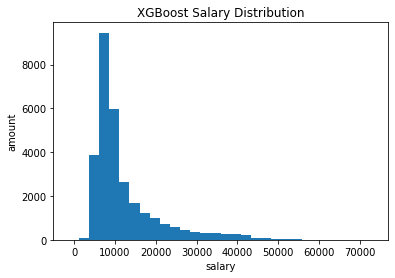

In [23]:
print('เงินเดือนเฉลี่ย =',round(np.mean(y_prediction)), 'บาทต่อเดือน')
print(np.max(y_prediction))
print(np.min(y_prediction))
plt.hist(y_prediction, bins=30)
plt.title('XGBoost Salary Distribution')
plt.xlabel('salary')
plt.ylabel('amount')
plt.show()

0.7247607810524627
3304.5893065322257


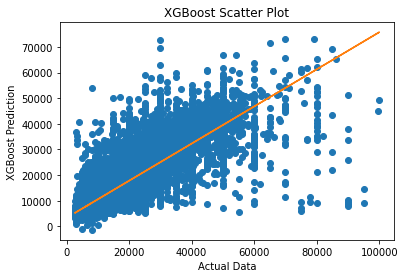

In [24]:
m, b = np.polyfit(y_test, y_prediction, 1)
print(m)
print(b)
plt.plot(y_test, y_prediction, 'o')
plt.plot(y_test, m*y_test + b)
plt.title('XGBoost Scatter Plot')
plt.xlabel('Actual Data')
plt.ylabel('XGBoost Prediction')
plt.show()